# [Introduction to Data Science: A Comp-Math-Stat Approach](http://datascience-intro.github.io/1MS041-2020/)
## 1MS041, 2020 
&copy;2020 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# Singular value decomposition

In the book they explain the Singular Value Decomposition differently. The concept of singular value decomposition is tightly connected to Principal Component Analysis, and the methods to compute the SVD is how we get the components in PCA. We will therefore switch between explaining tthe ideas in the context of PCA as well as using the linear algebra "geometric" concepts. So, for those of you who know PCA but not SVD will have a hook, but also those of you who know linear algebra will understand the ideas of PCA.

Consider a set of points in $R^d$, for instance the following plot (in $R^2$):

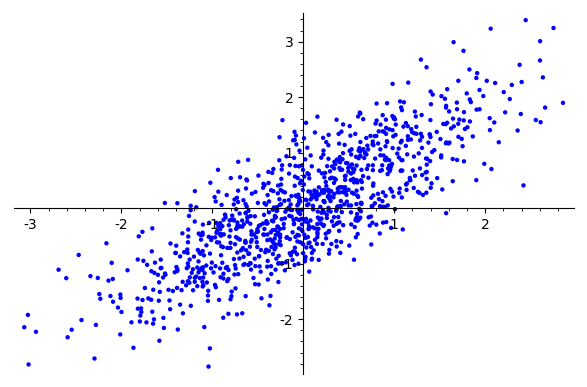

In [137]:
import numpy as np
X = np.random.multivariate_normal(mean=(0,0),cov=[(1,0.8),(0.8,1)],size=(1000,))
points(X)

When we considered linear regression we considered linear approximations and minimized the squared error to find our function. That is, we only considered the y-component of our error. 

### Projections of vectors

Consider two vectors $a$ and $b$, we would like to project $a$ onto $b$, i.e.
<img width=500px src="images/Projection_and_rejection.png"></img>

From the above picture we can think of the decomposition of $a$ in terms of $b$ as two vectors, namely $a_1$ and $a_2$, they are orthogonal, which we write as $a_1 \perp a_2$.

Lets say that we wish to approximate the data using a low-dimensional subspace, think of a low-dimensional hyperplane. In the case of 2d there is only 1d hyperplanes (lines), but if you have, say 100 dimensional we could consider the best fitting 10 dimensional hyperplane. What we mean with best fitting is that the distance from the point to its projection onto our subspace is as small as possible. Think of our 2d example above, then we would like to find the line such that orthogonal projection gives the smallest error. Just looking at the plot we would take the line $y=x$. 
<img src="images/first_singular_vector.png"></img>
But how do we formulate this rigorously?

Consider a line given by the unit vector $w$, and consider a point $x$ then the projection of $x$ onto $w$ is as above given by
$$
    (w \cdot x) w
$$

We will now use these ideas applied to IID samples of points $\{X_1,\ldots,X_n\}\in \mathbb{R}^m$ with zero expectation. Let $w$ be a unit vector. Consider the projection of each $X_i$ onto $w$ but only consider the proportion i.e. $X_i \cdot w$, then define
$$
    Y_i = (X_i \cdot w)
$$
The line with maximal variance can be written as
$$
    v_1:=\arg\max_{\|v\|=1} \sum_i Var(Y_i) = \arg\max_{\|v\|=1} \sum_{j=1}^n ((X_i \cdot v) - E[X_i \cdot v])^2 = \arg\max_{\|v\|=1} \sum_{j=1}^n |X_i \cdot v|^2
$$

If we construct a matrix $A$ of size $n \times m$ with rows $X_i$ then we can rewrite
$$
    \sum_{j=1}^n |X_i \cdot v|^2 = |Av|^2
$$
and our problem reduces to the linear algebra problem of given an $n \times m$ matrix $A$ to find the direction that is most "expanded/least contracted" by $A$, in the following sense
$$
    \arg\max_{\|w\|=1} |Aw|
$$

### Definition
> The vector $v_1 \in \mathbb{R}^m$ of the ($n \times m$) matrix $A$, defined as
> $$v_1:= \arg\max_{\|w\|=1} |Aw|$$
> is called the `first singular vector` of $A$.
> The value $\sigma_1(A)$ defined as
> $$\sigma_1(A) := |Av_1|$$
> is called the `first singular value` of $A$.

#### Note
> In the context where $A$ is constructed from our IID vectors $X_1,\ldots,X_n$, we see that $\sigma_1$ is the standard deviation in the direction of the first singular vector.

Now that we have defined the first singular vector, we can define the second singular vector. This is simply a vector that is orthogonal to $v_1$ again solving our maximum problem, i.e.
$$
    v_2 := \arg\max_{\|v\|=1, v \perp v_1} |Av|
$$

We can interpret this as follows, consider the plane given by the first singular vector $v_1$ as the normal, then we can consider our new problem by finding the vector $v$ that maximizes $|(P_1A)v|$ where $P_1A=\{P_1A_{1,\cdot},\ldots,P_1A_{n,\cdot}\}$ where $P$ is the projection of a vector onto the plane $v_1 \cdot x = 0$.

<img src="images/first_singular_vector.png"></img><img src="images/projection_first_singular_vector.png"></img>

### Theorem (Greedy Algorithm)
> Let $A$ be an n x d matrix with singular vectors $v_1,...,v_r$. For $1 \leq k \leq r$, let $V_k$ be the subspace spanned by $v_1,\ldots,v_k$. For each $k$, $V_k$ is the best fit $k$-dimensional subspace for $A$.

What is $V_k$?
$$
    V_k = \{\alpha_1 v_1 + \ldots + \alpha_k v_k: (\alpha_1,\ldots,\alpha_k) \in \mathbb{R}^k\} =: span(\{v_1,\ldots,v_k\}).
$$
What do we mean by best fit? Let $\tilde V_k$ be another $k$-dimensional subspace consider the distance of a point $p$ to the $k$-dimensional subspace $\tilde V_k$, such a space is spanned by an orthonormal basis $\tilde v_1, \ldots, \tilde v_k$, the distance from $p$ to $\tilde V_k$ can be seen to be
$$
    \|p - proj_{\tilde V_k} p\| = \|p - \sum_{i=1}^k (\tilde v_i \cdot p)\tilde v_i\|
$$
We mean that  $V_k$  is  the $k$-dimensional subspace that minimizes
$$
    \sum_{i=1}^n \|X_i - proj_{\tilde V_k} X_i\|^2
$$

But we can use the Pythagorean theorem to get
$$
    \sum_{i=1}^n \left (\|proj_{\tilde V_k}X_i\|^2 +  \|X_i - proj_{\tilde V_k}X_i\|^2 \right ) = \sum_{i=1}^n \|X_i\|^2
$$

and thus we can get
$$
    \sum_{i=1}^n \left (\|proj_{\tilde V_k}X_i\|^2 -  \|X_i\|^2 \right ) = \sum_{i=1}^n \|X_i - proj_{\tilde V_k}X_i\|^2
$$

From the above we see that the best fitting subspace is the subspace that maximizes the "variance" in the sense that we have seen. The point I am making is that we can rephrase the theorem as saying that finding $v_1,\ldots,v_k$ in a greedy way by maximizing the variance is the same as directly minimizing the variance of the deviation from the subspace.

In [138]:
import numpy as np
from scipy.optimize import minimize
def findFirstSingularVector(A):
    '''Takes a matrix of form n x m and returns a tuple of the singular vector and singular value
    '''
    def negsumofsquares(v):
        return -np.sum((A@v)**2)
    constraints = ({'type': 'eq', 'fun': lambda w:  1-(np.sum(w**2))})
    m = A.shape[1]
    initial_vector=np.array([0]*(m-1)+[1])
    ans1 = minimize(negsumofsquares, x0=initial_vector,constraints=constraints)
    if (ans1.success):
        return ans1.x,np.sqrt(-ans1.fun)
    else:
        raise Exception("No convergence")

def projectOnPlane(A,normal):
    '''Project the rows of A onto the plane given by "normal * x = 0"'''
    
    return A - (A@normal).reshape(-1,1)*normal

We can now use the code above to find the singular vectors, let us take a look at the example data I plotted above

In [139]:
v1,s1 = findFirstSingularVector(X)
print(v1,s1)

[0.70119032 0.71297415] 43.64412155006291


As we can see this is pretty much identical to the vector in the 45 degree direction. To find the second singular vector, we simply project our data onto the plane spanned by having $v_1$ as the normal.

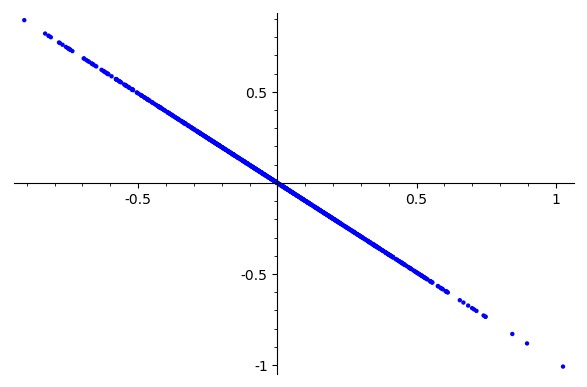

In [140]:
P_1A = projectOnPlane(X,v1)
points(P_1A)

In [141]:
v_2,s2 = findFirstSingularVector(P_1A)
print(v_2,s2)

[-0.71297416  0.7011903 ] 13.776542179623133


Its clear which direction this is headed. Let us also look at what happens when we project the data onto the plane with normal $v_2$.

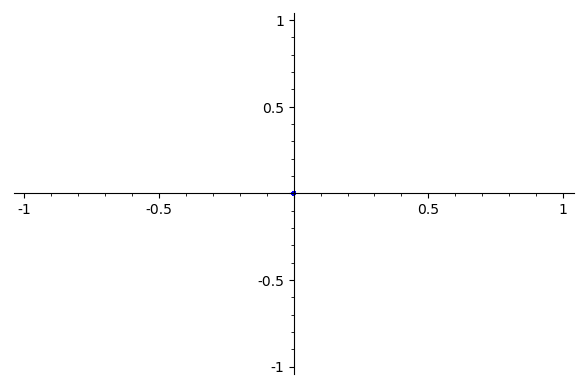

In [142]:
P=points(projectOnPlane(P_1A,v_2))
P.xmax(1);P.xmin(-1);P.ymax(1);P.ymin(-1);P.show()

## Question: What have we done, two projections in a row? What is the projection of a projection?

It should be clear from the definition and the "Greedy Algorithm" theorem that $proj_{V_m} A = A$. That is, if we use all possible singular vectors, then we can represent the data from $A$ as points in $V_m$. That is any row of $A$ can be written as a linear combination of all the singular vectors.

We can now implement PCA using our methods above

In [143]:
def PCA(A,k=1):
    '''Takes a n x m matrix of points, where the points are on the rows. 
    It then computes the first k singular vectors with corresponding singular values'''
    assert(len(A.shape) == 2), "A needs to be a 2d matrix"
    assert((1 <= k) and (k <= A.shape[1])), "We can only compute the number of singular vectors up to the dimension of the data"
    vectors = []
    values = []
    PA = A
    for i in range(k):
        v,s = findFirstSingularVector(PA)
        PA = projectOnPlane(PA,v)
        vectors.append(v)
        values.append(s)
    return vectors,values

Performing PCA on X is a simple as

In [144]:
PCA(X,2)

([array([0.70119032, 0.71297415]), array([-0.71297416,  0.7011903 ])],
 [43.64412155006291, 13.776542179623133])

In [145]:
#We can even do 3 dimension
Z = np.random.normal(size=(1000,3))

In [146]:
PCA(Z,3)

([array([ 0.30071157, -0.0988841 ,  0.94857498]),
  array([3.10844006e-01, 9.50460790e-01, 5.38815774e-04]),
  array([-0.90163661,  0.29469681,  0.31655207])],
 [32.808252086174186, 31.94275557319373, 30.734584870596866])

## Question: Is this a good way of finding the singular vectors?

### YouTry:
Test and see what happens if we try to apply our PCA on something with more dimensions, like 10 dimension and we would like 5 singular vectors, what happens? Why?

# Singular Value Decomposition

Remember that we said that if we compute $m$ singular vectors of the $n \times m$ dimensional matrix $A$, then
$$
    proj_{V_m} A = A
$$
this implies that we can write each row in $A$ as $X_i = \sum_{j=1}^m (X_i \cdot v_j) v_j$ which we can now rewrite as
$$
    A = \sum_{j=1}^m A v_j v_j^T
$$
denoting $u_i:=\frac{A v_i}{\sigma_i}$ we see that the above expression becomes
$$
    A = \sum_{j=1}^m \sigma_j u_j^T v_j
$$

This is the singular value decomposition. I.e. we have decomposed $A$ into a sum of matrices, that is $u_i^T v_j$ is $n \times m$ matrices.

Rewriting the above equation in matrix format we get
$$
    A = UDV^T
$$
where $U$ is the matrix with $u_1,\ldots$ as the columns, $D$ is a diagonal matrix with $\sigma_i$ as the diagonal and $V$ is the matrix with $v_i$ as columns of $V$.

### Definition
> The vectors $u_i$ are called the `left singular vectors`.

### Power method

Now let us consider the matrix $A^TA$ this matrix has dimension $m \times m$, using our decomposition above we obtain that
$$
    A^T A = (UDV^T)^T(UDV^T) = (VDU^T UDV^T) = VD^2V^T
$$
since $U^TU = I$ which comes from the fact that the columns are orthonormal. This means that for any column $v_i$ in $V$
$$
    A^T A v_i = VD^2V^T v_i = \sigma_i^2 v_i
$$
so we see that $v_i$ is the $i$:th eigenvector of $A^T A$ with eigenvalue $\sigma_i^2$.
We can thus find the singular vectors by trying to find the eigenvectors of $A^T A$.

How do we find the eigenvectors of $B = A^T A$? Well first note that
$$
    B^k = (V D^2 V^T)^k = (V D^{2k} V^T)
$$
by the same argument as above, i.e. $V^T V = I$. Thus we see that if $\sigma_1 > \sigma_2$ then if we let $k$ be large enough then
$$
    B^k \approx (\sigma_1)^{2k} v_1 v_1^T.
$$

In [174]:
Z1 = np.random.normal(size=(1000,10))
Z1 = Z1-np.mean(Z1,axis=0).reshape(1,-1)
B=Z1.T@Z1
print(B.shape)

(10, 10)


In [175]:
B_0 = B
v1_approx = B[:,0]
for i in range(200):
    B_0 = B@B_0
    B_0 = B_0 / np.linalg.norm(B_0) # Just normalize so that we reduce change of overflow
    # Take the first column of B_0
    b = B_0[:,0]
    v1_approx = b/np.linalg.norm(b)
    #print(v1_approx)

Let us check what result we got

In [176]:
v1_approx

array([ 0.1493876 ,  0.21620261, -0.47761772, -0.35633324,  0.29051073,
        0.03135059, -0.06240826,  0.46948639,  0.18289104, -0.48239711])

The vector we get is supposed to be an eigenvector of $B$, let us check if that is true

In [177]:
Bv1 = B@v1_approx
v1_approx-Bv1/np.linalg.norm(Bv1)

array([ 1.06345135e-06, -1.35104577e-06,  1.90363788e-07, -5.78334635e-08,
       -2.75997258e-07,  7.27653258e-07, -1.12775871e-07,  7.25065719e-07,
        9.22217594e-08,  2.14339921e-07])

Ok, so most components are of order $10^{-7}$, which is fairly accurate. Let us check with numpy's built in SVD and see what we get

In [178]:
U,D,VT = np.linalg.svd(Z1,full_matrices=False) # Interestingly enough numpy documentation calls this reduced SVD

SVD from numpy returns $U,D,V.T$ so that we can write $Z1 = UDV.T$. Remember that the columns of $V$ is the singular vectors, so we can extract them as follows

In [179]:
V = VT.T
V[:,0]

array([ 0.14936915,  0.21622844, -0.47762118, -0.3563323 ,  0.2905164 ,
        0.03133576, -0.06240522,  0.46947226,  0.18288876, -0.48240109])

We can also check if we get back our original matrix $Z1$ if we multiply everything together

In [180]:
# square error is of the order $10^{-13}$, pretty good
np.linalg.norm(Z1-(U@np.diag(D)@VT))

1.0911062278901517e-13

# PCA

What is PCA, well basically it is a coordinate transformation from the original coordinates to the coordinate system given by the singular vectors. Since $V$ is orthonormal it is as simple as a product, i.e.

$$
    A = UDV^T
$$
Recall that each row in $A$ is a data point i.e. an $m$ dimensional vector and that $V$ is an orthonormal basis, as such we project each point in $A$ onto each basis vector from $V$ by using dot products, as in $(X_i \cdot v_i)v_i$, the coordinate in the basis is just $X_i \cdot v_i$, and as such we get
$$
    PCA(A) = AV =  UDV^TV = UD
$$
Lets try it out

In [232]:
U@np.diag(D)

array([[ 0.47222831,  0.83935822,  0.9094001 , ..., -0.64448825,
        -0.96925377,  0.84945398],
       [ 0.04182362, -0.67904644,  0.42458119, ...,  0.15152753,
         0.22323113, -1.14144978],
       [ 0.58345673, -0.0401185 , -0.68407071, ...,  0.41729496,
        -0.73095769,  1.20738967],
       ...,
       [-0.97921689,  0.13250368, -1.13173882, ..., -0.39941174,
         0.35801287,  0.91094769],
       [-1.77177124, -1.6050528 ,  1.50778283, ...,  1.2601297 ,
         0.79757116,  0.08420705],
       [ 1.04300729, -0.20764258,  1.17584069, ...,  0.96102114,
        -0.24604095, -2.36773572]])

In [276]:
(Z1@V)@V.T

array([[-0.20029619, -0.51986993, -0.29111595, ...,  0.67929096,
        -1.62198962, -0.22837652],
       [ 1.15773823, -0.35905955, -1.50160834, ..., -1.07497865,
        -0.15603384, -0.47175578],
       [-1.00087856, -0.59745759, -1.24473314, ...,  0.66293933,
        -0.05713934,  0.52632625],
       ...,
       [-1.35998953,  0.30949321,  0.10752836, ..., -0.17308752,
        -1.29499151,  0.30970246],
       [ 1.96638388, -1.12539493, -0.61611575, ..., -0.85213875,
        -0.74780935,  1.90181906],
       [ 1.89239897,  0.05281536,  0.93907818, ..., -0.19333934,
         1.13571946, -0.71668594]])

###  PCA class

since we dont all have `sklearn` lets implement our own PCA class that we can use from now.

In [351]:
import numpy as np

class PCA(object):

    def __init__(self,n_components):
        self.n_components =  n_components
        self.components=None
        self.singular_values=None
        self.dimension=None
        self.mean=None

    def fit(self,X):
        assert(type(X) == np.ndarray), "Please input type np.ndarray!"
        assert(len(X.shape) == 2), "Please input 2d array!"
        assert(X.shape[1] >= self.n_components), "Number of features smaller than number of components to compute!"
        print("Number of data_points: %d, number of features: %d, Number of components: %d" %(X.shape[0],X.shape[1],self.n_components))
        
        X = self._center(X) # Make sure the data is centered (each feature has empirical mean zero)
        self.dimension=X.shape[1] # This is the dimension of the data
        self.components,self.singular_values = self._compute(X) # Compute the singular vectors
        
    def _center(self,X):
        self.mean = np.mean(X,axis=0).reshape(1,-1)
        return X-self.mean
        
    def transform(self,X):
        if (type(self.components) == None):
            raise Exception("Not fitted yet!")
        
        assert(type(X) == np.ndarray), "Please input type np.ndarray!"
        assert(len(X.shape) == 2), "Please input 2d array!"
        assert(X.shape[1] == self.dimension), "Incorrect number of features!"
        
        return (X-self.mean)@self.components
    
    def inverse_transform(self,X):
        if (type(self.components) == None):
            raise Exception("Not fitted yet!")
        
        assert(type(X) == np.ndarray), "Please input type np.ndarray!"
        assert(len(X.shape) == 2), "Please input 2d array!"
        assert(X.shape[1] == self.n_components), "Incorrect number of features!"
        
        return X@self.components.T+self.mean
    
    def project(self,X):
        return self.inverse_transform(self.transform(X))
        
    def _compute(self,X):
        U,D,VT = np.linalg.svd(X,full_matrices=False)
        
        return (VT.T)[:,:self.n_components],D

In [215]:
pca = PCA(10)

In [219]:
pca.fit(Z1)

Number of data_points: 1000, number of features: 10, Number of components: 10


In [220]:
pca.transform(Z1)

array([[ 0.47222831,  0.83935822,  0.9094001 , ..., -0.64448825,
        -0.96925377,  0.84945398],
       [ 0.04182362, -0.67904644,  0.42458119, ...,  0.15152753,
         0.22323113, -1.14144978],
       [ 0.58345673, -0.0401185 , -0.68407071, ...,  0.41729496,
        -0.73095769,  1.20738967],
       ...,
       [-0.97921689,  0.13250368, -1.13173882, ..., -0.39941174,
         0.35801287,  0.91094769],
       [-1.77177124, -1.6050528 ,  1.50778283, ...,  1.2601297 ,
         0.79757116,  0.08420705],
       [ 1.04300729, -0.20764258,  1.17584069, ...,  0.96102114,
        -0.24604095, -2.36773572]])

# This is all cool and such, but what can you do with it?

Singular value decomposition can be used in the following ways

* Studying underlying factors. The famous `g factor`: proposed by Spearman (Spearman correlation), to describe "general intelligence" as a singular vector based on data about IQ, Math ability and other cognitive tests. This is also called Factor analysis.

In [298]:
def showURL(url, ht=500):
    """Return an IFrame of the url to show in notebook with height ht"""
    from IPython.display import IFrame
    return IFrame(url, width='95%', height=ht) 
showURL('https://en.wikipedia.org/wiki/G_factor_(psychometrics)#Factor_structure_of_cognitive_abilities',300)

In [299]:
showURL('https://en.wikipedia.org/wiki/Principal_component_analysis#Applications')

* Compressing a representation of data, as a dimensional reduction technique. This is similar to the rank $k$ approximation idea.

### Example on compressing data

In [264]:
def load_digits():
    import csv
    data = []
    target = []
    with open('data/digits.csv', mode='r') as f:
        reader = csv.reader(f)
        header = next(reader)
        for row in reader:
            data.append([float(x) for x in row[:-1]])
            target.append(int(row[-1]))
    return np.array(data),np.array(target)

In [265]:
X,Y = load_digits()

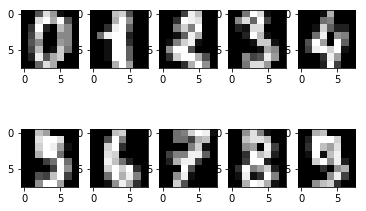

In [266]:
fig, ax = plt.subplots(2,5)
plt.gray()
for i in range(10):
    row = floor(i/5)
    column = i % 5
    ax[row,column].imshow(X[i,:].reshape(8,8))

In [352]:
pca_digit = PCA(10)

In [353]:
pca_digit.fit(X)

Number of data_points: 1797, number of features: 64, Number of components: 10


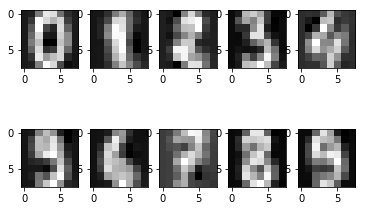

In [354]:
X_projected = pca_digit.project(X)
fig, ax = plt.subplots(2,5)
plt.gray()
for i in range(10):
    row = floor(i/5)
    column = i % 5
    ax[row,column].imshow(X_projected[i,:].reshape(8,8))

What we can see is that even with only 10 components we where able to fairly well represent the digits, although its clear that some are not so easy.

### Explained variance

Explained variance is how much percentage of the total variance is captured by our singular vectors. Remember the interpretation of the singular values as the standard deviation, as such the variance explained of the first $k$ components is just the sum of the singular values squared and divided by the total variance.

In [358]:
variances = pca_digit.singular_values**2/(X.shape[0]-1)

In [359]:
np.cumsum(vara/np.sum(vara))

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

## Decorrelation
Note that since the singular vectors are orthogonal, we immediately have that the transformed values always have zero correlation.

# Recommender engines

Let us say that we have a library of movies, lets say that we have $m$ movies. Furthermore assume that we have $n$ users that are watching these movies and outputting a like whenever they liked a movie. We can represent this as a matrix of the form $n \times m$, with a $1$ in position $i,j$ if user $i$ liked movie $j$.

There is an idea that is called collaborative filtering:

In [362]:
showURL('https://en.wikipedia.org/wiki/Collaborative_filtering')

In [363]:
showURL('https://en.wikipedia.org/wiki/Matrix_factorization_(recommender_systems)',500)

Note that we can from the singular value decomposition and what we did with PCA we can do the following

$$
    A = U \Sigma V^T
    = \begin{bmatrix} U_1 & U_2 \end{bmatrix} \begin{bmatrix} \Sigma_r & 0 \\ 0 & 0 \end{bmatrix} \begin{bmatrix} V_1^T \\ V_2^T \end{bmatrix}
    = U_1 \left(\Sigma_r V_1^T\right) .
$$

This method is a type of ranking factorization, note that for $C = U_1$ and $F = \Sigma_r V_1^T$, then the product $CF$ is a low rank factorization approximation of $A$.

In [365]:
import csv
user_item_data=[]
with open('data/ratings.csv',mode='r') as f:
    reader = csv.reader(f)
    print(next(reader))
    for row in reader:
        user_item_data.append(row)

['userId', 'movieId', 'rating', 'timestamp']


In [375]:
movie_ids = [row[1] for row in user_item_data]
users = [row[0] for row in user_item_data]
#user_item_data[:10]

In [381]:
n_movies = len(set(movie_ids))
movie_to_index_dict = dict(zip(set(movie_ids),range(n_movies)))
n_users = len(set(users))
user_to_index_dict = dict(zip(set(users),range(n_users)))

In [382]:
user_item = np.zeros((n_users,n_movies))

In [392]:
for row in user_item_data:
    user_index = user_to_index_dict[row[0]]
    movie_index = movie_to_index_dict[row[1]]
    if (float(row[2]) > 3): # Lets say that rating >3 is that user liked it
        user_item[user_index,movie_index] = 1

In [395]:
U,D,VT = np.linalg.svd(user_item,full_matrices=False)

Lets choose a small value for the rank, lets say $100$

In [416]:
n_latent = 100
C = U[:,:n_latent]
F = np.diag(D[:n_latent])@VT[:n_latent,:]

In [417]:
C.shape

(610, 100)

In [418]:
F.shape

(100, 9724)

In [420]:
np.sum(np.abs(user_item-(C@F > 1/2)))/np.sum(user_item)

0.3111024693758507

Now the idea is that $CF$ is the prediction of the scores, and we would construct a recommendation for each user based on that which is predicted in $CF$ but the user has not yet seen. We could set a threshold for predicted as $>1/2$ or we could simply list the recommendations in order of descending predicted score.

### This is a simple recommender system and this is a fairly large field of study